In [26]:
from dataprep.eda import create_report
import sweetviz as sv

In [27]:
import pandas as pd 
import pytz
import numpy as np
import seaborn as sns

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from torchtext.data.utils import get_tokenizer

import matplotlib.pyplot as plt

import torch
from torch import nn 
import torch.nn.functional as F
from torch import utils

torch.manual_seed(0)
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [60]:
train=pd.read_csv('https://raw.githubusercontent.com/zerickzhan/Group-20/main/review_train.csv')
challenge=pd.read_csv('https://raw.githubusercontent.com/zerickzhan/Group-20/main/review_challenge.csv')

In [30]:
train

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
0,570306133677760513,cairdin,neutral,1.0000,NaN,NaN,EgyptAir,What said.,0,NaN,24/2/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301130888122368,jnardino,positive,0.3486,NaN,0.0000,EgyptAir,plus you've added commercials to the experienc...,0,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301083672813571,yvonnalynn,neutral,0.6837,NaN,NaN,EgyptAir,I didn't today... Must mean I need to take ano...,0,NaN,24/2/2015 11:15,Lets Play,Central Time (US & Canada)
3,570301031407624196,jnardino,negative,1.0000,Bad Flight,0.7033,EgyptAir,"it's really aggressive to blast obnoxious ""ent...",0,NaN,24/2/2015 11:15,NaN,Pacific Time (US & Canada)
4,570300817074462722,jnardino,negative,1.0000,Can't Tell,1.0000,EgyptAir,and it's a really big bad thing about it,0,NaN,24/2/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,569587686496825344,KristenReenders,positive,0.3487,NaN,0.0000,Qantas,thank you we got on a different flight to Chic...,0,NaN,22/2/2015 12:01,NaN,NaN
13758,569587371693355008,itsropes,negative,1.0000,Customer Service Issue,1.0000,Qantas,leaving over minutes Late Flight. No warnings ...,0,NaN,22/2/2015 11:59,Texas,NaN
13759,569587242672398336,sanyabun,neutral,1.0000,NaN,NaN,Qantas,Please bring American Airlines to #BlackBerry,0,NaN,22/2/2015 11:59,"Nigeria,lagos",NaN
13760,569587188687634433,SraJackson,negative,1.0000,Customer Service Issue,0.6659,Qantas,"you have my money, you change my flight, and d...",0,NaN,22/2/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [ ]:
# Univariate Analysis

In [31]:
analyze_report = sv.analyze(train)

                                             |                                             | [  0%]   00:00 ->…

In [32]:
analyze_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
analyze_reportchallenge = sv.analyze(challenge)

                                             |                                             | [  0%]   00:00 ->…

In [34]:
analyze_reportchallenge.show_html('challenge.html')

Report challenge.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [74]:
train['review_id'].describe()

count    1.376200e+04
mean     5.692199e+17
std      7.793554e+14
min      5.675883e+17
25%      5.685594e+17
50%      5.694844e+17
75%      5.698917e+17
max      5.703106e+17
Name: review_id, dtype: float64

We need to first identify dependent values, independent values , categorical values, and continuous values before we intitial our EDA analysis. 

In [72]:
train[train["review_id"]==570286841737318400]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
11230,570286841737318400,djjohnpayne,0.0,1.0,Cancelled Flight,0.6304,Qantas,you guys are killing me. http://t.co/iPGeIcSm,0,"[0.0, 0.0]",24/2/2015 10:19,"Las Vegas, NV",Pacific Time (US & Canada)
11384,570286841737318400,djjohnpayne,0.0,1.0,Cancelled Flight,1.0000,Qantas,you guys are killing me. http://t.co/iPGeIcSm,0,"[0.0, 0.0]",24/2/2015 10:19,"Las Vegas, NV",Pacific Time (US & Canada)


In [73]:
train[train["review_id"]==570267562623152128]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
11298,570267562623152128,alinaxkristin,0.0,1.0,Flight Attendant Complaints,1.0000,Qantas,you could train your flight attendants to have...,0,NaN,24/2/2015 9:02,Miami,Quito
11453,570267562623152128,alinaxkristin,0.0,1.0,Flight Attendant Complaints,0.6688,Qantas,you could train your flight attendants to have...,0,NaN,24/2/2015 9:02,Miami,Quito


In [80]:
train=train.sort_values(by=['sentiment_confidence'])
train=train.drop_duplicates(subset=['review_id'], keep='last')

from the above example we can see several values are duplicated with the only difference being the negative_reason_confidence, which made the review_id not an unique key.
Therefore, we will remove the values with lower sentiment confidence.

In [ ]:
train = train.drop_duplicates(subset='review_id', keep="first")

In [61]:
train['airline_sentiment']=train['airline_sentiment'].replace("negative", 0)
train['airline_sentiment']=train['airline_sentiment'].replace("neutral", 0.5)
train['airline_sentiment']=train['airline_sentiment'].replace("positive", 1)

Changed sentiment analysis from words into numeric values

In [64]:
train.describe()

,review_id,airline_sentiment,sentiment_confidence,negative_reason_confidence,thumbup_count
count,1.376200e+04,13762.000000,13762.000000,9889.000000,13762.000000
mean,5.692199e+17,0.267403,0.900215,0.639178,0.082764
std,7.793554e+14,0.378214,0.162848,0.330886,0.763072
min,5.675883e+17,0.000000,0.335000,0.000000,0.000000
25%,5.685594e+17,0.000000,0.692500,0.360900,0.000000
50%,5.694844e+17,0.000000,1.000000,0.670600,0.000000
75%,5.698917e+17,0.500000,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,1.000000,44.000000


<AxesSubplot:title={'center':'Histogram of ApplicantIncome'}, xlabel='thumbup_count'>

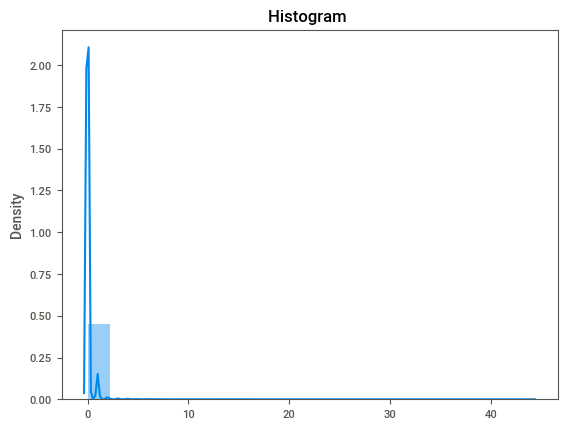

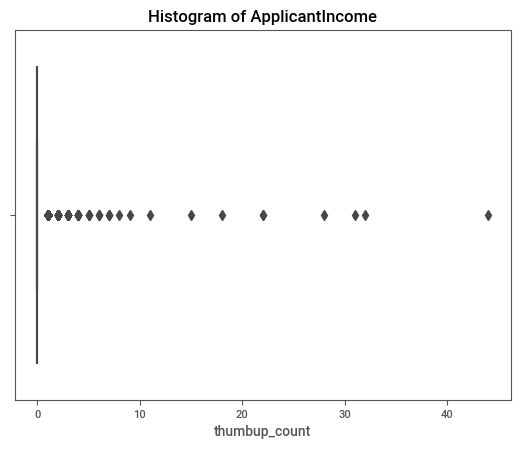

In [68]:
fig, ax = plt.subplots()
ax.set(title ="Histogram ")
sns.distplot(a=train[["thumbup_count"]], bins=20)
fig, ax = plt.subplots()
ax.set(title ="Histogram of ApplicantIncome")
sns.boxplot(x="thumbup_count", data=train)

In [ ]:
fig, ax = plt.subplots()
ax.set(title ="Histogram ")
sns.distplot(a=train[["sentiment_confidence"]], bins=20)

# Bivariate Analysis 


In [36]:
filtered_data_number = train[train['user_name'].str.contains(r'\d', regex=True, na=False)]

In [37]:
train[train['review_city']=='Does it really matter']

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
8745,569985288992264192,ElmiraBudMan,negative,1.0000,Customer Service Issue,0.3561,Qatar Airways,PLANS CHANGED! IS THAT WHAT U CALL NOT BEIN AB...,0,NaN,23/2/2015 14:20,Does it really matter,NaN
8769,569972250385862656,ElmiraBudMan,negative,1.0000,Lost Luggage,0.6723,Qatar Airways,only happened because u couldn't get us home t...,0,NaN,23/2/2015 13:29,Does it really matter,NaN
8771,569971542538346496,ElmiraBudMan,negative,0.6902,Can't Tell,0.6902,Qatar Airways,the exhaustion of traveling n runnin thru the ...,0,NaN,23/2/2015 13:26,Does it really matter,NaN
8777,569970626057801728,ElmiraBudMan,neutral,0.7010,NaN,0.0000,Qatar Airways,doesn't take into account the $ it cost rent a...,0,NaN,23/2/2015 13:22,Does it really matter,NaN
8783,569969714245431296,ElmiraBudMan,negative,1.0000,Flight Attendant Complaints,0.6736,Qatar Airways,we had a friend there telling the gate attenda...,0,NaN,23/2/2015 13:19,Does it really matter,NaN
8791,569968609440563201,ElmiraBudMan,negative,1.0000,Cancelled Flight,1.0000,Qatar Airways,is okay for u Cancelled Flight change a flight...,0,NaN,23/2/2015 13:14,Does it really matter,NaN
8794,569967808446009345,ElmiraBudMan,negative,1.0000,Customer Service Issue,0.6805,Qatar Airways,if you actually cared about what you did it wo...,0,NaN,23/2/2015 13:11,Does it really matter,NaN
8795,569967469135142914,ElmiraBudMan,negative,1.0000,Late Flight,0.3681,Qatar Airways,you idiots kept an on time plane on the Tarmac...,0,NaN,23/2/2015 13:10,Does it really matter,NaN
8805,569960904852312064,ElmiraBudMan,negative,1.0000,Customer Service Issue,1.0000,Qatar Airways,just an FYI I'll be writing registered letters...,0,NaN,23/2/2015 12:44,Does it really matter,NaN
8809,569959975566467072,ElmiraBudMan,negative,1.0000,Customer Service Issue,1.0000,Qatar Airways,I find it funny that responds but you don't. Y...,0,NaN,23/2/2015 12:40,Does it really matter,NaN


In [38]:
user_to_city_mapping = train[train['user_timezone'] != ''].groupby('user_name')['user_timezone'].first()

# Fill in the empty review_city values using the mapping
train['user_timezone'] = train.apply(
    lambda row: user_to_city_mapping.get(row['user_name'], row['user_timezone']),
    axis=1
)


In [39]:
train[train['user_name']=="somekidnamedjon"]

,review_id,user_name,airline_sentiment,sentiment_confidence,negative_reason,negative_reason_confidence,airline_name,review_text,thumbup_count,review_coordinates,review_timestamp,review_city,user_timezone
8336,567776348828360707,somekidnamedjon,positive,0.6485,NaN,NaN,Singapore Airlines,I would love for you to fly my best friend hom...,0,NaN,17/2/2015 12:03,✈️✈️,Eastern Time (US & Canada)


we need to identify spams and elimination of data that attribute nothing to the sentimente analysis:<br>
we found that news and user spams are both included in the database. 
In the mean time we also don't see much values in the timezone. As user time zone does not impact sentiment of their 
Therefore, we decide to not include that column too. 

We would also get ride off the he thumb_up data as it contains a 94% zero value.

creat a column that is a count of occurance of the user name  

In [40]:
train['user_name_count'] = train.groupby('user_name')['user_name'].transform('count')

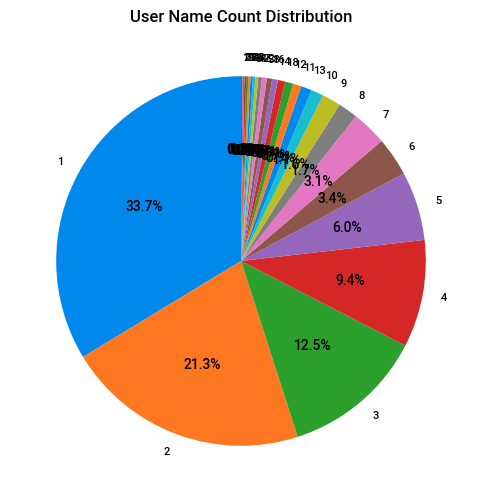

In [41]:
user_name_count = train['user_name_count'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(user_name_count, labels=user_name_count.index, autopct='%1.1f%%', startangle=90)
plt.title('User Name Count Distribution')
plt.show()

In [42]:
analyze_report_filtered_data_number.show_html('filtered_data_number.html')

NameError: name 'analyze_report_filtered_data_number' is not defined

I want to see the distribution for airline sentiment where only user name that contained numbers are selected.

Text(0.5, 1.0, 'Airline Sentiment Distribution')

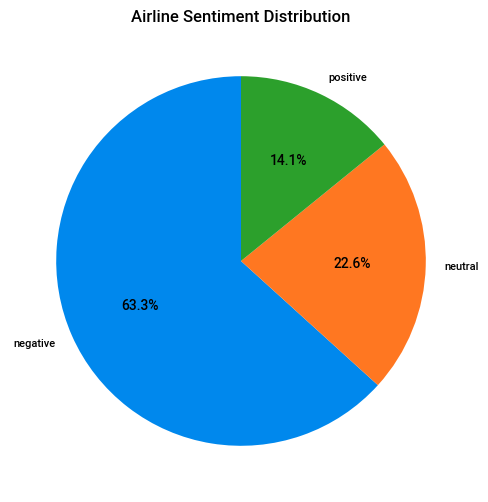

In [43]:
sentiment_counts=filtered_data_number['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Airline Sentiment Distribution')

In [44]:
user_name_counts = train['user_name'].value_counts()
filtered_df = train[train['user_name'].isin(user_name_counts[user_name_counts<6].index)]

In [46]:
analyze_report_filtered_over6 = sv.analyze(filtered_df)

                                             |                                             | [  0%]   00:00 ->…

In [48]:
analyze_report_filtered_over6.show_html('analyze_report_filtered_under6.html')

Report analyze_report_filtered_under6.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
count_blank = len(train[(train['user_timezone'].isna() | train['user_timezone'].eq('')) & (train['review_city'].isna() | train['review_city'].eq(''))])

print("Number of rows where both 'review_timestamp' and 'review_city' are blank:", count_blank)

Number of rows where both 'review_timestamp' and 'review_city' are blank: 2499


In [51]:
count_blank2 = len(train[
    (train['user_timezone'].isna() | train['user_timezone'].eq('')) &
    (train['review_city'].isna() | train['review_city'].eq('')) &
    (train['review_coordinates'].isna() | train['review_coordinates'].eq(''))
])

print("Number of rows where 'user_timezone', 'review_city', and 'review_coordinates' are blank:", count_blank)


Number of rows where 'user_timezone', 'review_city', and 'review_coordinates' are blank: 2499


In [52]:
debug_selection = len(train[(train['negative_reason_confidence'].isna()) & (train['airline_sentiment'] == 'negative')])
print(debug_selection)

0


In [53]:
analyze_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the above EDA extracts we can see: <br>
1. The airline sentiment are separated into 3 different kinds with 63% in negative, 21% in neural, and 16% in positive.<br>
2. There are 10 negative reasons, and the top 1 accounts for 32% being: Customer service Issue.<br>
3. We can see the data is collected from 6 different airline companies, with the top 3 being Emirate (26%), Qatar Airways(20%), and Qantas (19%)<br>

<br>
The data is suffering from missing data:<br>

1. 92.24% of review coordinates are missing, we this varible is going to cause collinearity issue with review city and we decide to keep review city. <br>

2. Contrary to our believe,review city and user time zone do not share all its missing rows. Only 2499 rows are missing for both review city and review time_zone. The inclusion of review coordinate can bring this down to 2418.<br>

3. The missing values of negative_reason is caused by the airline_sentiment not being negative. we are going to create a new column called reivew and backfill " positive" or "neural" for the missing values.


Due to the frequent apperance of unformted and incorrect entries, we are unable to use review city and decide to remove that one.
Due to the huge amount of missing data for the review coordianate. we decide to remove this column too.

## Feature Engineering 

In [54]:
train['review'] = train.apply(lambda row: row['negative_reason'] if not pd.isna(row['negative_reason']) and row['negative_reason'] != '' else row['airline_sentiment'], axis=1)

Create a new columon the review column. 

In [55]:
filtered_data = train[train['user_timezone'].isna() & ~train['review_city'].isna()]

In [ ]:
# preprocessing data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
target = le.fit_transform(train['airline_sentiment']) # convert target into integers
train['airline_sentiment'] = target
print(le.classes_) # this shows which index maps to which class


In [ ]:
np.random.seed(511365)

index = list(range(train.shape[0])) # an list of indices
np.random.shuffle(index) # shuffle the index in-place

p_val = 0.2
p_test = 0.2
N_test = int(train.shape[0] * p_test)
N_val = int(train.shape[0] * p_val)


# get training, val and test sets
test_data = train.iloc[ index[:N_test] ,:]
val_data = train.iloc[ index[N_test: (N_test+N_val)], :]
train_data = train.iloc[ index[(N_test+N_val):], :]

print(test_data.shape)
print(val_data.shape)
print(train_data.shape)

In [ ]:
# define our own torch dataset
# for a torch dataset, we need to define two functions: 
#     __len__: return the length of dataset
#     __getitem__: given a index (integer), return the corresponding sample, both y and X

class SpamDataset(utils.data.Dataset):
    def __init__(self, myData):
        """
        myData should be a dataframe object containing both y (first col) and X (second col)
        """
        super().__init__()
        self.data = myData
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        return (self.data.iloc[idx,2], self.data.iloc[idx,7]) # (target, text)

In [ ]:
# now we can build our torch dataset 
train_torch = SpamDataset(train_data)
val_torch = SpamDataset(val_data)
test_torch = SpamDataset(test_data)

In [ ]:
# check
train_torch.__getitem__(3)

In [ ]:
tokenizer = get_tokenizer('basic_english')

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

# ===== Build vocabulary =====
# an unknown token is added for all unknown words outside the documents
# you may specify the min_freq to filter out infrequent words
vocabulary = build_vocab_from_iterator(
    [tokenizer(msg) for msg in train['review_text']],
    specials=["<unk>"],
    min_freq = 3, # filter out all words that appear less than three times
)
# Set to avoid errors with unknown words
vocabulary.set_default_index(vocabulary["<unk>"])

In [ ]:
len(vocabulary)

In [ ]:
# The vocab object maps a word to an idx (an integer)
print(vocabulary['better'])
print(vocabulary['sun'])
print(vocabulary['iertuei']) # something not in vocab will be mapped to default_index = 0

In [ ]:
# define a function that converts a document into tokens (represented by index)
def doc_tokenizer(doc):
    return torch.tensor([vocabulary[token] for token in tokenizer(doc)], dtype=torch.long)

In [ ]:
# ========= Step 2 ==============
# Notice in a corpus, each document can have different size. Thus, we usually pad zeros to the maximum length of document.
# Alternatively, you can concat all documents into a long vector 
# and the starting index of each document is identified in the variable called offsets.

def collate_batch(batch):
    
    target_list, text_list, offsets = [], [], [0] # initalize the first offset to be 0 here
        
    # loop through all samples in batch
    for idx in range(len(batch)):
        
        _label = batch[idx][0]
        _text = batch[idx][1]
        
        target_list.append( _label )
        tokens = doc_tokenizer( _text )
        text_list.append(tokens)
        
        # ====== wrong ======
        #if idx == 0:
        #    offsets.append(0)  # the first document starts from idx 0
        #else:
        #    offsets.append(offsets[-1] + tokens.size(0)) # the next document starts from (offsets[-1] + tokens.size(0))
        # ===================
        
        offsets.append(offsets[-1] + tokens.size(0))
    
    offsets = offsets[:-1] # remove the last entry
    
    # convert to torch tensor
    target_list = torch.tensor(target_list, dtype=torch.int64)
    offsets = torch.tensor(offsets)
    text_list = torch.cat(text_list) # concat into a long vector
    
    return target_list, text_list, offsets

In [ ]:
torch.manual_seed(0)

batchSize = 8
train_loader = utils.data.DataLoader(train_torch, batch_size=batchSize, shuffle=True, collate_fn=collate_batch)
val_loader = utils.data.DataLoader(val_torch, batch_size=batchSize, shuffle=True, collate_fn=collate_batch)
test_loader = utils.data.DataLoader(test_torch, batch_size=batchSize, shuffle=False, collate_fn=collate_batch)

In [ ]:
list(train_loader)[0]

Model building

In [ ]:
# ====== Step 1 ========= 
class SpamClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, mode='mean') # embedding layer
        self.Linear1 = nn.Linear(embed_dim, 1)
        self.Dropout = nn.Dropout(p=0.1)
    
    def forward(self, text, offsets):
        # note we need offsets to indicate which document we have
        out = self.embedding(text, offsets)
        out = self.Dropout(out)
        out = self.Linear1(out)
        return out
        # for the last layer, we don't apply activation because we can use BCEWithLogitsLoss to combine sigmoid with BCELoss
        
# model initalization
embed_dim = 8
model = SpamClassifier(len(vocabulary), embed_dim)

In [ ]:
# ======= Step 2 ==========
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
def evaluate(dataloader):
    
    y_pred = torch.tensor([]) # store prediction
    y_true = torch.tensor([]) # store true label
    
    model.eval()
    with torch.no_grad():
        for label, text, offsets in dataloader:
            y_pred_batch = model(text, offsets)
            
            y_pred = torch.cat((y_pred, y_pred_batch.squeeze()))
            y_true = torch.cat((y_true, label.squeeze()))
            
    return y_pred, y_true

In [ ]:
# ======== Step 3 ==============
epochs = 300
for epoch in range(epochs):
    
    for y_train, text, offsets in train_loader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # calulate output and loss 
        y_pred_train = model(text, offsets)
        loss = loss_fn(y_pred_train.squeeze(), y_train.float())

        # backprop and take a step
        loss.backward()
        optimizer.step()
    
    # evaluate on validation set
    y_pred_val, y_val = evaluate(val_loader)
    loss_val = loss_fn(y_pred_val.squeeze(), y_val.float())
    
    # note when making prediction, do add sigmoid activation
    pred_label = (torch.sigmoid(y_pred_val) > 0.5).long() # find out the class prediction
    acc = (pred_label == y_val).float().sum()/y_val.shape[0]
    
    model.train() # because when evaluating we change mode to eval mode
    
    print('Epoch {}: {:.4f} (train), {:.4f} (val), {:.4f} (val acc)'.format(epoch, loss, loss_val, acc))

In [ ]:
# prediction on test data
y_pred_test, y_true_test = evaluate(test_loader)
y_pred_test = torch.sigmoid(y_pred_test) > 0.5

print(confusion_matrix(y_true_test, y_pred_test))
print(classification_report(y_true_test, y_pred_test))